In [ ]:
import numpy as np

In [ ]:
!pip install -q kagglehub

import kagglehub
import os

path = kagglehub.dataset_download("chethuhn/network-intrusion-dataset")

print("Archivos descargados en:", path)

files = os.listdir(path)
print("Contenido del dataset:")
for file in files:
    print("-", file)

import pandas as pd

csv_files = [f for f in files if f.endswith(".csv")]
if csv_files:
    df = pd.read_csv(os.path.join(path, csv_files[1]))
    print("\nPrimeras filas del archivo CSV:")
    display(df.head())
else:
    print("No se encontraron archivos CSV en el dataset.")


Archivos descargados en: /kaggle/input/network-intrusion-dataset
Contenido del dataset:
- Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
- Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
- Tuesday-WorkingHours.pcap_ISCX.csv
- Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
- Monday-WorkingHours.pcap_ISCX.csv
- Friday-WorkingHours-Morning.pcap_ISCX.csv
- Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
- Wednesday-workingHours.pcap_ISCX.csv

Primeras filas del archivo CSV:


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,389,113095465,48,24,9668,10012,403,0,201.416667,203.548293,...,32,203985.500,5.758373e+05,1629110,379,13800000.0,4.277541e+06,16500000,6737603,BENIGN
1,389,113473706,68,40,11364,12718,403,0,167.117647,171.919413,...,32,178326.875,5.034269e+05,1424245,325,13800000.0,4.229413e+06,16500000,6945512,BENIGN
2,0,119945515,150,0,0,0,0,0,0.000000,0.000000,...,0,6909777.333,1.170000e+07,20400000,6,24400000.0,2.430000e+07,60100000,5702188,BENIGN
3,443,60261928,9,7,2330,4221,1093,0,258.888889,409.702161,...,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,53,269,2,2,102,322,51,51,51.000000,0.000000,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [ ]:
import io

# Ruta al archivo
file_path = os.path.join(path, "Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")

# Leer el contenido con manejo de errores de codificación
with open(file_path, 'r', encoding='utf-8', errors='replace') as f:
    content = f.read()

# Convertir a un buffer de texto y cargar con pandas
df = pd.read_csv(io.StringIO(content))

# Limpiar nombres de columnas
df.columns = df.columns.str.strip()

# Corregir los valores corruptos en 'Label'
df['Label'] = df['Label'].str.replace('�', '-', regex=False).str.strip()

# Verificar
print("Valores únicos en 'Label':", df['Label'].unique())


Valores únicos en 'Label': ['BENIGN' 'Web Attack - Brute Force' 'Web Attack - XSS'
 'Web Attack - Sql Injection']


In [ ]:
df.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [ ]:
print("Valores únicos en df['Label']:")
print(df['Label'].unique())

Valores únicos en df['Label']:
['BENIGN' 'Web Attack - Brute Force' 'Web Attack - XSS'
 'Web Attack - Sql Injection']


In [ ]:
# Unificar clases maliciosas
df['Label'] = df['Label'].replace({
    'Web Attack - Brute Force': 'WebAttack',
    'Web Attack - XSS': 'WebAttack',
    'Web Attack - Sql Injection': 'WebAttack'
})

# Crear variable binaria
df['is_malign'] = df['Label'].apply(lambda x: 1 if x == 'WebAttack' else 0)

# Revisar distribución de clases
print("\nDistribución de clases:")
print(df['is_malign'].value_counts())

# (Opcional) Eliminar la columna 'Label'
df = df.drop(columns=['Label'])

# Codificar variables categóricas (por si queda alguna)
cat_cols = df.select_dtypes(include='object').columns.tolist()
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Separar X e y
X = df_encoded.drop('is_malign', axis=1)
y = df_encoded['is_malign']

# Limpiar NaNs e infinitos
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X = X.dropna()
y = y[X.index]

# Escalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\n✅ Preprocesamiento completo. Datos listos para entrenamiento.")
print("X shape:", X_scaled.shape)
print("y shape:", y.shape)



Distribución de clases:
is_malign
0    168186
1      2180
Name: count, dtype: int64

✅ Preprocesamiento completo. Datos listos para entrenamiento.
X shape: (170231, 78)
y shape: (170231,)


In [ ]:
import numpy as np

print("Distribución total de clases:")
print("BENIGN (0):", np.sum(y == 0))
print("MALIGN (1):", np.sum(y == 1))
print("Total:", len(y))


Distribución total de clases:
BENIGN (0): 168051
MALIGN (1): 2180
Total: 170231


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("\n📊 Evaluación del modelo Random Forest (BENIGN vs MALIGN):")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Clasificación:")
print(classification_report(y_test, y_pred))
print("\n🔢 Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))


📊 Evaluación del modelo Random Forest (BENIGN vs MALIGN):
Accuracy: 0.9996083806540043

📋 Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50416
           1       1.00      0.97      0.98       654

    accuracy                           1.00     51070
   macro avg       1.00      0.99      0.99     51070
weighted avg       1.00      1.00      1.00     51070


🔢 Matriz de confusión:
[[50415     1]
 [   19   635]]


$ \ Importancia \ de \ las \ variables $

In [ ]:
# Obtener importancias
importances = rf_model.feature_importances_
feature_names = X.columns

# Convertir a DataFrame ordenado
import pandas as pd

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Ver las 10 más importantes
print("🔝 Top 10 variables más importantes:")
display(feature_importance_df.head(10))

🔝 Top 10 variables más importantes:


,Feature,Importance
24,Fwd IAT Min,0.132615
19,Flow IAT Min,0.075895
67,Init_Win_bytes_backward,0.072545
36,Fwd Packets/s,0.053377
0,Destination Port,0.036877
4,Total Length of Fwd Packets,0.035225
16,Flow IAT Mean,0.035015
21,Fwd IAT Mean,0.029736
22,Fwd IAT Std,0.029125
39,Max Packet Length,0.027970


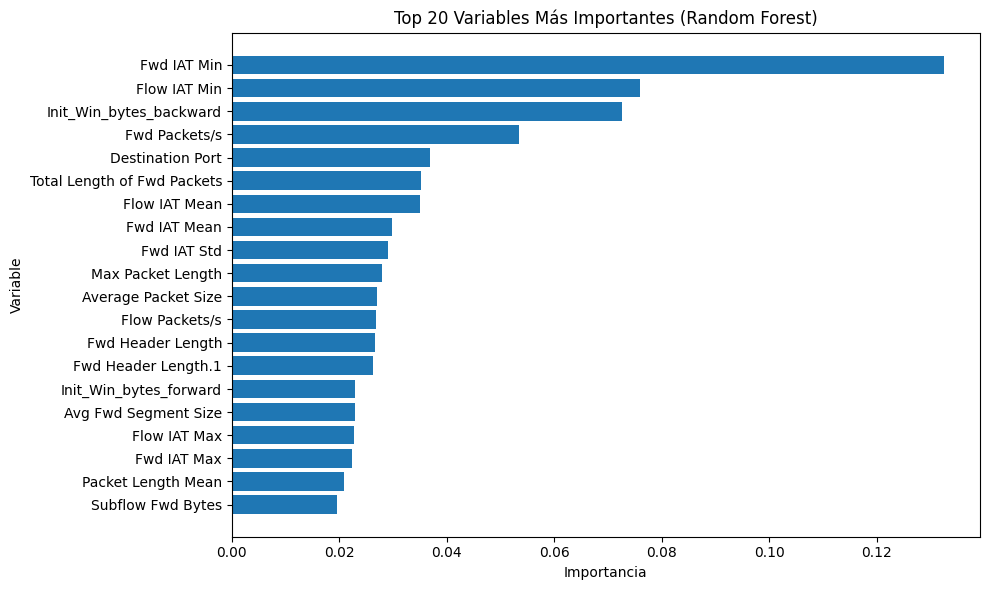

In [ ]:
import matplotlib.pyplot as plt

# Seleccionar top 20
top_n = 20
top_features = feature_importance_df.head(top_n)

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.gca().invert_yaxis()
plt.title(f'Top {top_n} Variables Más Importantes (Random Forest)')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

$ \ Validaciones \ $

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(rf_model, X_train, y_train, cv=10, scoring='accuracy')

print("\n Validación cruzada (10-fold) - Scores por partición:")
print(cross_val_scores)

print("\n Promedio de precisión (accuracy) de la validación cruzada:", cross_val_scores.mean())



 Validación cruzada (10-fold) - Scores por partición:
[0.99949652 0.99983216 0.99983216 0.99949648 0.99991608 0.99974824
 0.99949648 0.99974824 0.99974824 0.99974824]

 Promedio de precisión (accuracy) de la validación cruzada: 0.9997062814995168


In [ ]:
!pip install -q tensorflow

In [ ]:
# Preparación de datos para LSTM
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), return_sequences=False))
lstm_model.add(Dropout(0.3))
lstm_model.add(Dense(32, activation='relu'))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = lstm_model.fit(
    X_train_lstm, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

lstm_preds = lstm_model.predict(X_test_lstm)
lstm_preds_class = (lstm_preds > 0.5).astype("int32")

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print("\nEvaluación del modelo LSTM:")
print("Accuracy:", accuracy_score(y_test, lstm_preds_class))
print("\nClasificación completa:")
print(classification_report(y_test, lstm_preds_class))
print("Matriz de confusión:")
print(confusion_matrix(y_test, lstm_preds_class))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 30s 13ms/step - accuracy: 0.9886 - loss: 0.0886 - val_accuracy: 0.9943 - val_loss: 0.0137
Epoch 2/10
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9951 - loss: 0.0133 - val_accuracy: 0.9955 - val_loss: 0.0113
Epoch 3/10
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9960 - loss: 0.0105 - val_accuracy: 0.9960 - val_loss: 0.0109
Epoch 4/10
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9966 - loss: 0.0102 - val_accuracy: 0.9961 - val_loss: 0.0102
Epoch 5/10
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9967 - loss: 0.0093 - val_accuracy: 0.9965 - val_loss: 0.0093
Epoch 6/10
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9965 - loss: 0.0095 - val_accuracy: 0.9958 - val_loss: 0.0100
Epoch 7/10
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.9971 - loss: 0.0084 - val_accuracy: 0.9961 - val_loss: 0.0105
Epoch 8/10
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.9967 - loss: 0


 Comparación de métricas entre Random Forest y LSTM:


,Métrica,Random Forest,LSTM
0,Accuracy,0.999608,0.996710
1,Precision,0.998428,0.813953
2,Recall,0.970948,0.963303
3,F1-Score,0.984496,0.882353


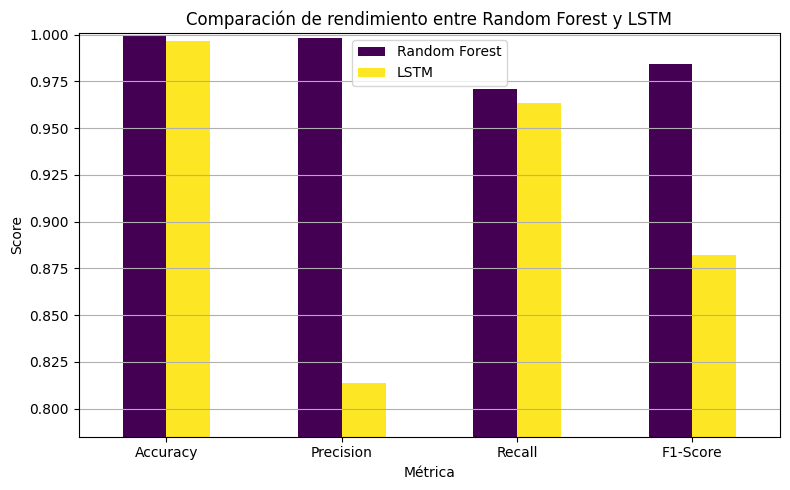

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)

lstm_accuracy = accuracy_score(y_test, lstm_preds_class)
lstm_precision = precision_score(y_test, lstm_preds_class)
lstm_recall = recall_score(y_test, lstm_preds_class)
lstm_f1 = f1_score(y_test, lstm_preds_class)

comparison_df = pd.DataFrame({
    'Métrica': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Random Forest': [rf_accuracy, rf_precision, rf_recall, rf_f1],
    'LSTM': [lstm_accuracy, lstm_precision, lstm_recall, lstm_f1]
})

print("\n Comparación de métricas entre Random Forest y LSTM:")
display(comparison_df)

import matplotlib.pyplot as plt

comparison_df.set_index('Métrica').plot(kind='bar', figsize=(8, 5), ylim=(0.785, 1.001), colormap='viridis')
plt.title('Comparación de rendimiento entre Random Forest y LSTM')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


$ \ Fine-Tuning \ en \ LSTM \ $

In [ ]:
!pip install -q keras-tuner

In [ ]:
import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

def build_lstm_model(hp):
    model = Sequential()

    # Tamaño de la capa LSTM
    model.add(LSTM(
        units=hp.Int('units', min_value=32, max_value=256, step=32),
        input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])
    ))

    # Dropout
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))

    # Capa de salida binaria
    model.add(Dense(1, activation='sigmoid'))

    # Compilación
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
        ),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

In [ ]:
tuner = kt.RandomSearch(
    build_lstm_model,
    objective='val_accuracy',
    max_trials=2,  # probará 10 combinaciones distintas
    executions_per_trial=1,
    directory='lstm_tuning_dir',
    project_name='web_attack_tuning'
)

# Búsqueda de hiperparámetros
tuner.search(X_train_lstm, y_train, epochs=10, validation_split=0.2, verbose=2)

Trial 4 Complete [00h 06m 53s]
val_accuracy: 0.9953426122665405

Best val_accuracy So Far: 0.9965593814849854
Total elapsed time: 00h 28m 09s


In [ ]:
# Mostrar mejores hiperparámetros encontrados
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"\n🔧 Mejores hiperparámetros encontrados:")
print(f" - units: {best_hps.get('units')}")
print(f" - dropout: {best_hps.get('dropout')}")
print(f" - learning_rate: {best_hps.get('learning_rate')}")

# Entrenar el mejor modelo
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train_lstm, y_train, epochs=20, validation_split=0.2, verbose=1)


🔧 Mejores hiperparámetros encontrados:
 - units: 128
 - dropout: 0.0
 - learning_rate: 0.0009428270474423584


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
2979/2979 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9821 - loss: 0.0697 - val_accuracy: 0.9948 - val_loss: 0.0132
Epoch 2/20
2979/2979 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.9952 - loss: 0.0131 - val_accuracy: 0.9954 - val_loss: 0.0114
Epoch 3/20
2979/2979 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.9957 - loss: 0.0110 - val_accuracy: 0.9954 - val_loss: 0.0110
Epoch 4/20
2979/2979 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.9963 - loss: 0.0100 - val_accuracy: 0.9960 - val_loss: 0.0100
Epoch 5/20
2979/2979 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.9965 - loss: 0.0096 - val_accuracy: 0.9961 - val_loss: 0.0100
Epoch 6/20
2979/2979 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.9967 - loss: 0.0090 - val_accuracy: 0.9962 - val_loss: 0.0099
Epoch 7/20
2979/2979 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.9967 - loss: 0.0095 - val_accuracy: 0.9965 - val_loss: 0.0089
Epoch 8/20
2979/2979 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.9970 - loss: 0

In [ ]:
# Evaluar en el conjunto de test
test_loss, test_accuracy = best_model.evaluate(X_test_lstm, y_test)
print(f"\n📊 Accuracy en test: {test_accuracy:.4f}")

1596/1596 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9966 - loss: 0.0094

📊 Accuracy en test: 0.9968


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Obtener predicciones
lstm_preds_proba = best_model.predict(X_test_lstm)
lstm_preds_class = (lstm_preds_proba > 0.5).astype("int32")

# Calcular métricas
lstm_accuracy = accuracy_score(y_test, lstm_preds_class)
lstm_precision = precision_score(y_test, lstm_preds_class)
lstm_recall = recall_score(y_test, lstm_preds_class)
lstm_f1 = f1_score(y_test, lstm_preds_class)

print("\n📋 Clasificación para LSTM fine-tuneado:")
print(classification_report(y_test, lstm_preds_class))

1596/1596 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step

📋 Clasificación para LSTM fine-tuneado:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50416
           1       0.82      0.97      0.89       654

    accuracy                           1.00     51070
   macro avg       0.91      0.98      0.94     51070
weighted avg       1.00      1.00      1.00     51070




🔍 Comparación actualizada de métricas:


,Métrica,Random Forest,LSTM Fine-Tuned
0,Accuracy,0.999608,0.996808
1,Precision,0.998428,0.815959
2,Recall,0.970948,0.969419
3,F1-Score,0.984496,0.886094


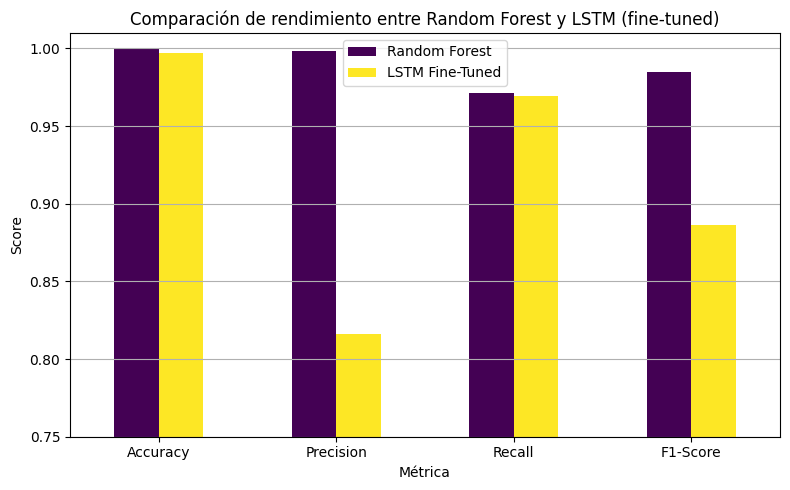

In [ ]:
comparison_df = pd.DataFrame({
    'Métrica': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Random Forest': [rf_accuracy, rf_precision, rf_recall, rf_f1],
    'LSTM Fine-Tuned': [lstm_accuracy, lstm_precision, lstm_recall, lstm_f1]
})

# Mostrar tabla
print("\n🔍 Comparación actualizada de métricas:")
display(comparison_df)

# Graficar
comparison_df.set_index('Métrica').plot(kind='bar', figsize=(8, 5), ylim=(0.75, 1.01), colormap='viridis')
plt.title('Comparación de rendimiento entre Random Forest y LSTM (fine-tuned)')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

$ \ Fine-Tuning \ para \ RandomForest \ $

In [ ]:
# Fine tuning para el modelo Randomforest

from sklearn.model_selection import GridSearchCV

# Espacio de búsqueda reducido
param_grid = {
    'n_estimators': [100],        # Solo un valor
    'max_depth': [None, 10],      # Dos opciones
    'min_samples_split': [2]      # Solo un valor
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,             # Menos folds
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor score de validación:", grid_search.best_score_)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Mejores parámetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Mejor score de validación: 0.9999350866094395
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     38214
        True       1.00      1.00      1.00     47615

    accuracy                           1.00     85829
   macro avg       1.00      1.00      1.00     85829
weighted avg       1.00      1.00      1.00     85829



In [ ]:
!pip install -U scikit-learn scikeras

In [ ]:
from scikeras.wrappers import KerasClassifier

def create_lstm_model(units=64, dropout_rate=0.3):
    model = Sequential()
    model.add(LSTM(units, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = KerasClassifier(
    model=create_lstm_model,
    units=64,
    dropout_rate=0.3,
    epochs=5,
    batch_size=64,
    verbose=0
)

param_grid = {
    'units': [32, 64],
    'dropout_rate': [0.3],
    'batch_size': [64]
}

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=2)
grid_result = grid.fit(X_train_lstm, y_train)

print("Mejores parámetros LSTM:", grid_result.best_params_)
print("Mejor score de validación:", grid_result.best_score_)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a l

Mejores parámetros LSTM: {'batch_size': 64, 'dropout_rate': 0.3, 'units': 64}
Mejor score de validación: 0.9995755666933538
